In [1]:
import numpy as np
import pandas as pd
unpickled_df_1 = pd.read_pickle('Data_Collection_1.pd')
unpickled_df_1

,Ticks(s),x-acc(m/s^2),y-acc(m/s^2),z-acc(m/s^2),x-vel(m/s),y-vel(m/s),z-vel(m/s),x-loc(m),y-loc(m),x-loc-center(m),...,past-throttle,past_brake,past-delta(radians),throttle,brake,delta(radians),input,speed(m/s),acceleration(m/s^2),d
0,4.652,0.006387,0.021613,-0.662515,-0.000704,-0.002626,4.479856e-02,-119.441172,149.300441,-120.701172,...,0.000000,0.0,0.000000,0.750000,0.0,-0.003050,-0.003050,0.002719,0.022537,0.000000
1,4.771,0.118154,0.009387,-0.210788,0.007984,-0.000933,4.107263e-03,-119.441561,149.300427,-120.701561,...,0.750000,0.0,-0.003050,0.750000,0.0,-0.003093,-0.003093,0.008038,0.118526,1.990297
2,4.906,-3.313641,0.011453,-0.034571,-0.326130,0.000499,-4.451633e-03,-119.459696,149.300437,-120.719696,...,0.750000,0.0,-0.003093,0.750000,0.0,-0.003113,-0.003113,0.326130,3.313661,2.931588
3,5.039,-4.085166,0.009332,0.013362,-0.875422,0.001846,-3.110418e-03,-119.545023,149.300541,-120.805023,...,0.750000,0.0,-0.003113,0.750000,0.0,-0.003176,-0.003176,0.875424,4.085177,3.774010
4,5.175,-3.899910,0.012245,0.015142,-1.416219,0.003435,-8.028655e-04,-119.706034,149.300552,-120.966034,...,0.750000,0.0,-0.003176,0.750000,0.0,-0.003143,-0.003143,1.416224,3.899929,4.519090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,207.219,-0.036851,0.000178,0.000011,0.155590,5.299089,-1.630621e-06,-247.843770,189.462922,-247.812515,...,0.292713,0.0,-0.007641,0.292814,0.0,-0.009035,-0.009035,5.301373,0.036851,0.457494
1484,207.352,0.128475,-0.006101,0.000030,0.167786,5.298452,7.628651e-07,-247.825832,190.169578,-247.791962,...,0.292814,0.0,-0.009035,0.293072,0.0,-0.009144,-0.009145,5.301108,0.128620,0.457781
1485,207.482,0.101283,-0.004510,0.000012,0.181158,5.297820,3.328001e-06,-247.806556,190.872815,-247.769806,...,0.293072,0.0,-0.009144,0.293287,0.0,-0.008788,-0.008789,5.300917,0.101383,0.458140
1486,207.606,0.079581,-0.002321,-0.000064,0.192403,5.297437,-1.315948e-06,-247.786419,191.550923,-247.746902,...,0.293287,0.0,-0.008788,0.293340,0.0,-0.008769,-0.008769,5.300930,0.079615,0.458359


In [16]:
import glob

files = glob.glob('*.pd')
df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)
df.to_pickle('Data_Collection_Compiled.pd')
x = np.array(df['x-loc(m)'])
y = np.array(df['y-loc(m)'])
print(np.min(x))
print(np.max(x))
print(np.min(y))
print(np.max(y))


-247.97085351485435
-72.98595368504948
148.99273807168882
237.17319002314773


In [17]:
x = np.array(unpickled_df_1['x-loc(m)'])
y = np.array(unpickled_df_1['y-loc(m)'])
theta = np.array(unpickled_df_1['theta(radians)'])
v = np.array(unpickled_df_1['speed(m/s)'])
d = np.array(unpickled_df_1['d'])
u = np.array(unpickled_df_1['input'])
t = np.array(unpickled_df_1['Ticks(s)'])
dx = np.divide(np.diff(x), np.diff(t))
dy = np.divide(np.diff(y), np.diff(t))
dv = np.divide(np.diff(v), np.diff(t))
dtheta = np.divide(np.diff(theta), np.diff(t))
dd = np.divide(np.diff(d), np.diff(t))
dx_p = np.multiply(v, np.cos(theta))[0:-1]
dy_p = np.multiply(v, np.sin(theta))[0:-1]
dv_p = (- 1.06 * v - 0.009 * np.multiply(v, v) - 3.6 * d + 3.37)[0:-1]
dtheta_p = (np.multiply(v, u) / 2.51)[0:-1]
dd_p = (v - 5.56)[0:-1]
difference_matrix = np.vstack((dx - dx_p, dy - dy_p, dv - dv_p, dtheta - dtheta_p, dd - dd_p))
norm = np.linalg.norm(difference_matrix, axis=0)
print(norm)

[22.52879591 13.95787429 16.42803083 ...  4.15834119  4.16294651
  4.16688786]


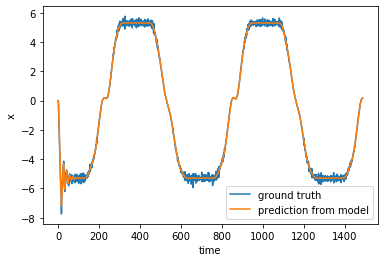

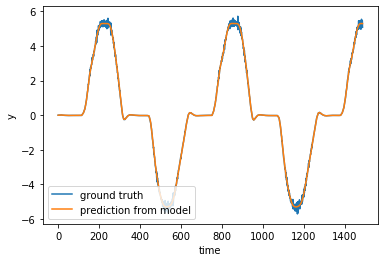

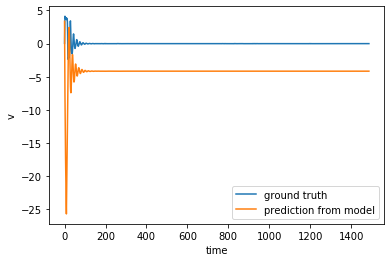

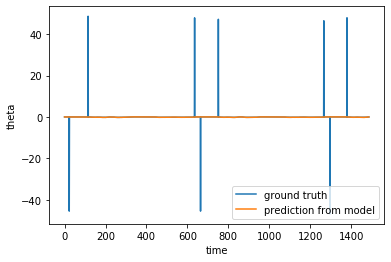

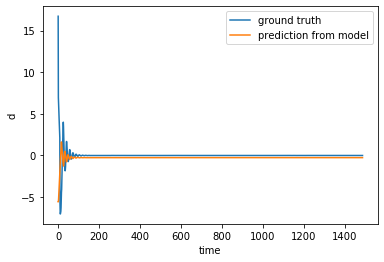

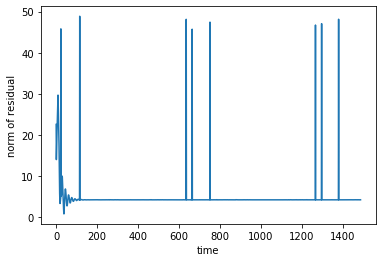

In [9]:
import matplotlib.pyplot as plt

plt.figure('x')
plt.xlabel('time')
plt.ylabel('x')
plt.plot(dx)
plt.plot(dx_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('y')
plt.xlabel('time')
plt.ylabel('y')
plt.plot(dy)
plt.plot(dy_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('v')
plt.xlabel('time')
plt.ylabel('v')
plt.plot(dv)
plt.plot(dv_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('theta')
plt.xlabel('time')
plt.ylabel('theta')
plt.plot(dtheta)
plt.plot(dtheta_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('d')
plt.xlabel('time')
plt.ylabel('d')
plt.plot(dd)
plt.plot(dd_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure()
plt.xlabel('time')
plt.ylabel('norm of residual')
plt.plot(norm)
plt.show()
